# Seattle House Data

## Abstract

This tutorial shows how to fit a regression model using Python code. After examining the data, the first part fits a model using the *sklearn* package. Then, we use the *keras* package to fit an artificial  neural network.


## Import and Describe the Data

We start by importing all of the packages needed for this tutorial. To show where they are required, we include them as comments.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
import random

from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler, MinMaxScaler


## The Data

These data come  from a [Kaggle competition](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction).

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

We start by reading in and checking the data.

In [3]:
#import pandas as pd
HouseData = pd.read_csv("https://raw.githubusercontent.com/OpenActTextDev/ActuarialRegression/refs/heads/main/CourseCSVData/kc_house_data.csv")
HouseData.head() # check the data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Let us look at the target (dependent) variable.

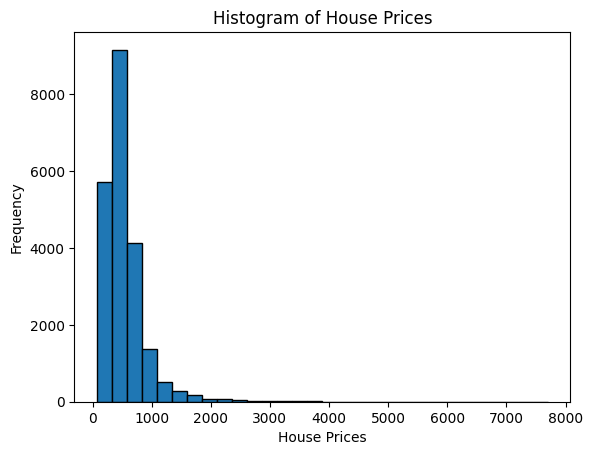

count    21613.000000
mean       540.088142
std        367.127196
min         75.000000
25%        321.950000
50%        450.000000
75%        645.000000
max       7700.000000
Name: price, dtype: float64


In [4]:
# Define target, sales in thousands
y = HouseData['price']/1000

# Plot histogram
#import matplotlib.pyplot as plt
plt.hist(y, bins=30, edgecolor="black")
plt.xlabel("House Prices")
plt.ylabel("Frequency")
plt.title("Histogram of House Prices")
plt.show()
print(y.describe())



Now, for the features (covariates).

In [5]:
# Define features (drop target + non-predictors like id, date)
X = HouseData.drop(columns=['price', 'id', 'date'])
print(X.describe())


           bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  21613.000000  21613.000000  21613.000000  2.161300e+04  21613.000000   
mean       3.370842      2.114757   2079.899736  1.510697e+04      1.494309   
std        0.930062      0.770163    918.440897  4.142051e+04      0.539989   
min        0.000000      0.000000    290.000000  5.200000e+02      1.000000   
25%        3.000000      1.750000   1427.000000  5.040000e+03      1.000000   
50%        3.000000      2.250000   1910.000000  7.618000e+03      1.500000   
75%        4.000000      2.500000   2550.000000  1.068800e+04      2.000000   
max       33.000000      8.000000  13540.000000  1.651359e+06      3.500000   

         waterfront          view     condition         grade    sqft_above  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       0.007542      0.234303      3.409430      7.656873   1788.390691   
std        0.086517      0.766318      0.650743    

We might be interested in geo-spatial features of the data.

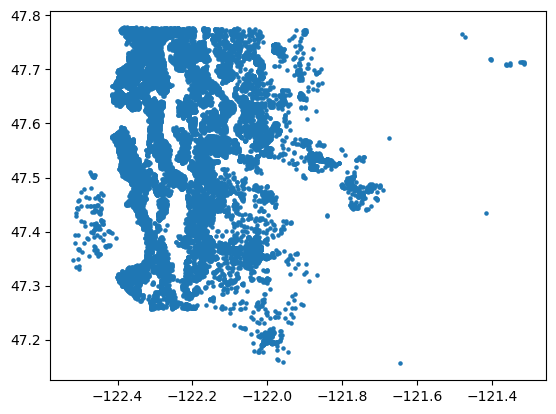

In [6]:
plt.scatter(X["long"], X["lat"], s=5);

Here is how one can split the data into training, validation, and testing sub-samples.

In [7]:
#from sklearn.model_selection import train_test_split
# Thanks https://datascience.stackexchange.com/a/15136
X_main, X_test, y_main, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# As 0.25 x 0.8 = 0.2
X_train, X_val, y_train, y_val = train_test_split(
    X_main, y_main, test_size=0.25, random_state=1
)


For presentation purposes, we use the simpler training and testing splits.

In [8]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16209, 18), (5404, 18), (16209,), (5404,))

# Regression Models

In [9]:
#from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
# Create summary table
summary_df = pd.DataFrame({
    "Feature": ["Intercept"] + list(X.columns),
    "Coefficient": [model.intercept_] + list(model.coef_)
})

print(summary_df)

          Feature  Coefficient
0       Intercept  6690.324603
1        bedrooms   -35.766541
2       bathrooms    41.144279
3     sqft_living     0.110443
4        sqft_lot     0.000129
5          floors     6.689550
6      waterfront   582.960458
7            view    52.870942
8       condition    26.385649
9           grade    95.890445
10     sqft_above     0.070785
11  sqft_basement     0.039658
12       yr_built    -2.620223
13   yr_renovated     0.019813
14        zipcode    -0.582420
15            lat   602.748226
16           long  -214.729828
17  sqft_living15     0.021681
18     sqft_lot15    -0.000383


For consistency with other analyses, let us drop a few of the variables and show another way to fit the regression model.

In [10]:
#  A shorter version of the features matrix
XTrainShort = X_train.drop(columns=['zipcode','lat', 'long', 'sqft_living15',
                               'sqft_lot15', 'sqft_basement','view', 'condition','grade'])
XTrainShortInt = sm.add_constant(XTrainShort)  # adds intercept term

#import statsmodels.api as sm
#from sklearn.metrics import r2_score
model = sm.OLS(y_train, XTrainShortInt).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     2517.
Date:                Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                        16:37:30   Log-Likelihood:            -1.1133e+05
No. Observations:               16209   AIC:                         2.227e+05
Df Residuals:                   16199   BIC:                         2.228e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6235.6063    159.012     39.215   

Another way to do the regression.

In [11]:
lr = LinearRegression()
lr.fit(XTrainShortInt, y_train)
print(lr.coef_)

[ 0.00000000e+00 -6.02962627e+01  6.83540894e+01  2.76741207e-01
 -3.46251883e-04  4.64163644e+01  6.92124831e+02  1.68531128e-02
 -3.20304110e+00  1.31971195e-02]


Now, create a vectors of predictions; one for the training set, one for the test set. Then, compare the training set predictions to actual target outcomes.

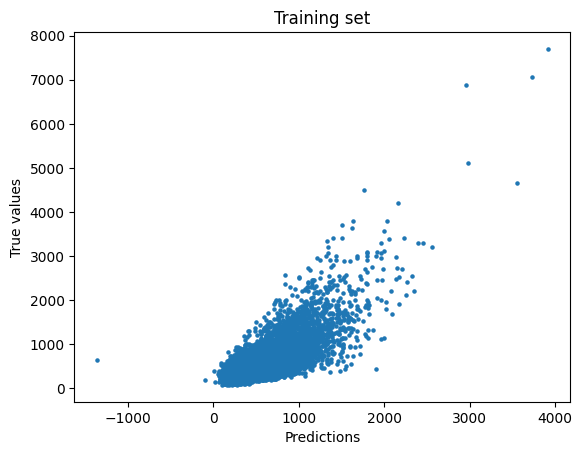

In [12]:
ytrain_predict = lr.predict(XTrainShortInt)
XTestShort = X_test.drop(columns=['zipcode','lat', 'long', 'sqft_living15',
                               'sqft_lot15', 'sqft_basement','view', 'condition','grade'])
XTestShortInt = sm.add_constant(XTestShort)  # adds intercept term
ytest_predict = lr.predict(XTestShortInt)

plt.scatter(ytrain_predict, y_train, s=5)
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Training set");


Compare the test set predictions to actual target outcomes.

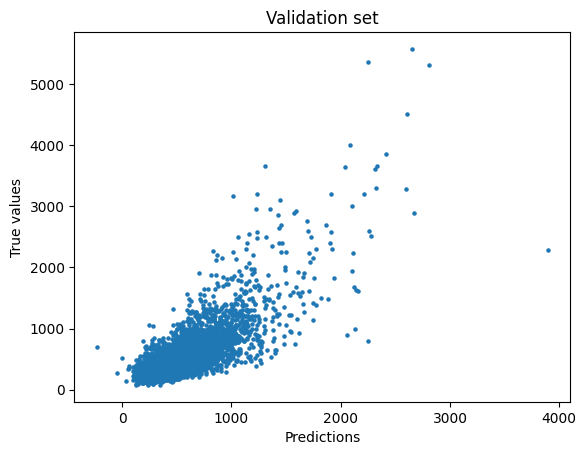

In [13]:
plt.scatter(ytest_predict, y_test, s=5)
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Validation set");

Now let us compare predictions to actuals for both the training and test sets. Take the square root of the mse (mean squared error) so the units are in dollars (not squared dollars).

In [14]:
#from sklearn.metrics import mean_squared_error as mse
print(np.sqrt(mse(ytrain_predict, y_train)))
print(np.sqrt(mse(ytest_predict, y_test)))


232.65580118752024
246.84386800716536


As anticipated, the fit is better for the training than the test set.

#  Neural Nets

We can start by specifying the model and taking a look at a summary of it.

This code mimics [Laub's First Keras Model](https://laub.au/DeepLearningForActuaries/Tabular-Data/deep-learning-keras.html#our-first-neural-network) (although with a different data set).

In [15]:
#from keras.models import Sequential
#from keras.layers import Dense, Input
# import random

random.seed(2025)
model = Sequential(
    [Input((9,)),
     Dense(30, activation="leaky_relu"),
     Dense(1, activation="leaky_relu")]
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 331 (1.29 KB)

 Trainable params: 331 (1.29 KB)

 Non-trainable params: 0 (0.00 B)

This neural network architecture includes one hidden layer with 30 neurons and an output layer with 1 neuron.

*    While there is an activation function specified (`leaky_relu`) for the hidden layer, there is no activation function specified for the output layer.
*    In situations where there is no specification, the output layer assumes a linear activation.

We next **compile** the model. Compiling involves giving instructions on how we want the model to be trained.

*   The optimizer (`adam`) explains how the model should learn (how the model should update the weights).
*    The loss function (`mse` for mean squared error) states the objective that the model needs to optimize.

We run the model through the entire dataset five times with the updated weights before the training completes. The `hist.history()` function returns the calculate mse at each step.

*  The `%time` command computes and prints the amount of time spend on training.
*  By setting `verbose=False` we can avoid printing of intermediate results during training.
*  Setting `verbose=True` is useful when we want to observe how the neural network is training.



In [16]:

model.compile("adam", "mse")
%time hist = model.fit(XTrainShort, y_train, epochs=5, validation_data=(XTestShort, y_test), verbose=True)

Epoch 1/5
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 301114.2812 - val_loss: 96267.5391
Epoch 2/5
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 94793.4688 - val_loss: 80594.4844
Epoch 3/5
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 78105.2500 - val_loss: 76690.7422
Epoch 4/5
507/507 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 74491.8984 - val_loss: 74270.0781
Epoch 5/5
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 70990.0703 - val_loss: 73379.8281
CPU times: user 9.29 s, sys: 789 ms, total: 10.1 s
Wall time: 11.8 s


We can see the history of the square root of the mean square error.

In [17]:
print(np.sqrt(hist.history["loss"]))

[387.59942273 309.33864685 311.09844453 268.57148141 260.09660165]


Now, we re-run the model with a longer training period, setting the number of epochs to 150. We do not need to see the output at each stage and so set `verbose=False`.

In [18]:
model.compile("adam", "mse")
%time hist = model.fit(XTrainShort, y_train, epochs=150, validation_data=(XTestShort, y_test), verbose=False)
hist.history["loss"]

CPU times: user 3min 49s, sys: 16.7 s, total: 4min 6s
Wall time: 4min 43s


[68696.921875,
 73806.265625,
 81029.6796875,
 74747.734375,
 107192.078125,
 66386.1328125,
 89829.4375,
 65292.4453125,
 63770.85546875,
 83549.4375,
 65622.265625,
 71406.6953125,
 61699.7734375,
 63630.70703125,
 65347.28515625,
 126074.0859375,
 71327.3984375,
 66821.046875,
 66003.4375,
 63740.66015625,
 60733.75390625,
 63292.18359375,
 77249.3125,
 93615.8515625,
 66899.609375,
 61618.6171875,
 62934.09765625,
 71096.796875,
 79977.734375,
 76783.6328125,
 57694.5078125,
 71411.71875,
 62008.37109375,
 67274.953125,
 62514.296875,
 63558.0,
 58214.25,
 62549.75390625,
 70377.625,
 68311.3203125,
 63351.12890625,
 74011.4453125,
 61452.72265625,
 70031.6328125,
 59953.3671875,
 63513.87109375,
 64883.55859375,
 64830.44140625,
 66249.09375,
 63666.08203125,
 59234.578125,
 66602.625,
 65801.2109375,
 79988.71875,
 67577.3515625,
 60139.1015625,
 62463.828125,
 67720.3828125,
 60611.4296875,
 64649.609375,
 59638.296875,
 61228.28125,
 71111.75,
 63606.328125,
 66687.109375,
 627

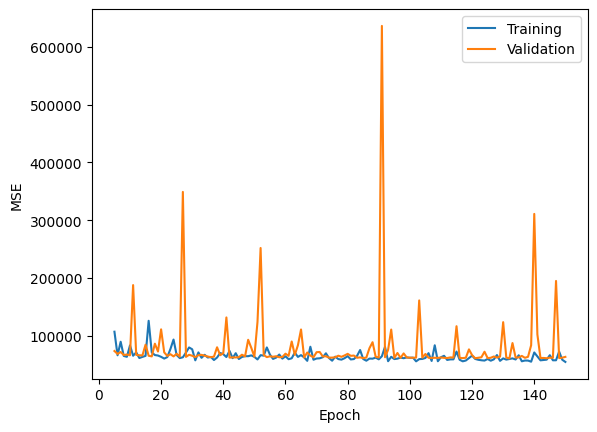

In [19]:
plt.plot(range(5, 151), hist.history["loss"][4:])
plt.plot(range(5, 151), hist.history["val_loss"][4:])

plt.legend(["Training", "Validation"])
plt.xlabel("Epoch")
plt.ylabel("MSE");

In [20]:
yNNtrain_predict= model.predict(XTrainShort, verbose=0)
print(pd.DataFrame(yNNtrain_predict) .describe())


                  0
count  16209.000000
mean     503.244537
std      267.011200
min     -165.264267
25%      355.401550
50%      443.025330
75%      554.724060
max     6271.540039


In [21]:
#from sklearn.metrics import mean_squared_error as mse
print(np.sqrt(mse(yNNtrain_predict, y_train)))

235.93397467752368


In [22]:
yNNtest_predict= model.predict(XTestShort, verbose=0)

print(pd.DataFrame(yNNtest_predict) .describe())
print(np.sqrt(mse(yNNtest_predict, y_test)))


                 0
count  5404.000000
mean    510.157288
std     283.487701
min    -219.035065
25%     354.201576
50%     444.979218
75%     562.353485
max    4081.478027
252.36033769347128


Recall in the basic regression fit that the training root mse was 232.6558 and the test root mse was
246.8438. So, we need to do better!

**Rescale the Features**

Machine learning approaches like to have well behaved features. As part of our routine model fitting procedures, we will recale the features so that they are in the unit [0,1] range.

In [23]:
#from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler.fit(XTrainShort)

XTrainShort_sc = scaler.transform(XTrainShort)
XTestShort_sc  = scaler.transform(XTestShort)
print(pd.DataFrame(XTrainShort_sc) .describe())

                  0             1             2             3             4  \
count  1.620900e+04  1.620900e+04  1.620900e+04  1.620900e+04  1.620900e+04   
mean   1.876194e-16 -6.926137e-17  5.874065e-17  8.109717e-18 -1.806056e-16   
std    1.000031e+00  1.000031e+00  1.000031e+00  1.000031e+00  1.000031e+00   
min   -3.608735e+00 -2.761375e+00 -1.966164e+00 -3.695520e-01 -9.186256e-01   
25%   -3.941321e-01 -8.011497e-01 -7.092478e-01 -2.540579e-01 -9.186256e-01   
50%   -3.941321e-01  1.789627e-01 -1.800198e-01 -1.872187e-01  2.158665e-03   
75%    6.774021e-01  5.056668e-01  5.256175e-01 -1.091237e-01  9.229429e-01   
max    3.175190e+01  7.693158e+00  1.099992e+01  2.961857e+01  3.685296e+00   

                  5             6             7             8  
count  1.620900e+04  1.620900e+04  1.620900e+04  1.620900e+04  
mean  -4.734321e-17  1.393995e-16  3.186023e-15  3.506905e-18  
std    1.000031e+00  1.000031e+00  1.000031e+00  1.000031e+00  
min   -8.378769e-02 -1.818889e+0

In [24]:
random.seed(2025)
model_sc = Sequential(
    [Dense(30, activation="leaky_relu"),
     Dense(1, activation="leaky_relu")]);


In [25]:

model_sc.compile("adam", "mse")
%time hist_sc = model_sc.fit(XTrainShort_sc, y_train, epochs=150, validation_data=(XTestShort_sc, y_test), verbose=False)
hist_sc.history["loss"]

CPU times: user 3min 58s, sys: 16.8 s, total: 4min 15s
Wall time: 4min 52s


[410781.125,
 364775.71875,
 286038.375,
 204797.9375,
 141628.5,
 101594.4453125,
 80002.984375,
 69504.2734375,
 64542.6171875,
 61836.18359375,
 59878.72265625,
 58272.34765625,
 56941.68359375,
 55849.02734375,
 54945.62109375,
 54284.2109375,
 53742.13671875,
 53281.15625,
 52890.7890625,
 52568.70703125,
 52290.6484375,
 52041.953125,
 51842.97265625,
 51655.4765625,
 51478.4765625,
 51324.875,
 51136.0078125,
 50960.17578125,
 50822.4921875,
 50662.984375,
 50563.2421875,
 50440.2421875,
 50347.671875,
 50231.625,
 50139.6875,
 50058.37890625,
 49968.22265625,
 49881.1640625,
 49790.671875,
 49714.91796875,
 49628.4765625,
 49555.6640625,
 49493.3359375,
 49411.265625,
 49334.26953125,
 49276.515625,
 49212.125,
 49153.58203125,
 49105.578125,
 49037.81640625,
 48987.40234375,
 48941.34765625,
 48893.3671875,
 48831.85546875,
 48796.35546875,
 48750.60546875,
 48688.671875,
 48652.53515625,
 48612.96875,
 48565.375,
 48538.02734375,
 48485.2109375,
 48447.37890625,
 48360.386718

In [26]:
print(np.sqrt(hist_sc.history["loss"]))

[640.92208965 603.96665367 534.82555567 452.54606119 376.33562149
 318.73883559 282.8479881  263.63663144 254.05239064 248.66882312
 244.70129271 241.39666041 238.6245662  236.32398808 234.4048231
 232.98972282 231.82350338 230.82711333 229.97997535 229.27866676
 228.67148584 228.12705479 227.69051947 227.278412   226.8886876
 226.54993931 226.13272168 225.74360629 225.43844434 225.08439389
 224.86271854 224.5890518  224.38286894 224.12412855 223.91893064
 223.73729887 223.53573016 223.34091444 223.1382349  222.9684237
 222.77449711 222.61101514 222.47097774 222.28644949 222.11319081
 221.98314266 221.83806031 221.70607125 221.59778457 221.44483829
 221.33097918 221.2269144  221.11844606 220.97931005 220.89897118
 220.79539277 220.6550971  220.57319682 220.48348861 220.37553176
 220.31347518 220.19357606 220.10765299 219.90995139 219.9403417
 219.87400511 219.78331836 219.68988263 219.62132716 219.55804329
 219.49804242 219.41260361 219.30941862 219.27870928 219.20834125
 219.11861799 

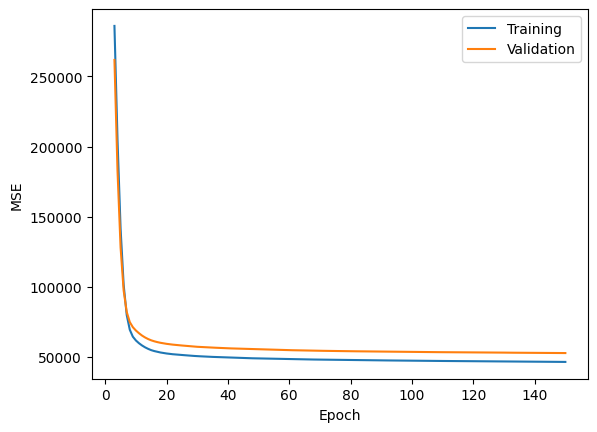

In [27]:
plt.plot(range(3, 151), hist_sc.history["loss"][2:])
plt.plot(range(3, 151), hist_sc.history["val_loss"][2:])

plt.legend(["Training", "Validation"])
plt.xlabel("Epoch")
plt.ylabel("MSE");

In [28]:
ysctrain_predict= model_sc.predict(XTrainShort_sc, verbose=0)
ysctest_predict = model_sc.predict(XTestShort_sc, verbose=0)

print(np.sqrt(mse(ysctrain_predict, y_train)))
print(np.sqrt(mse(ysctest_predict, y_test)))

215.61755077881944
229.94335956535977


Much better. Now we have beat the standard regression model.